In [1]:
#dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
#setting file path
file = Path("../datasets/provider_locations.csv")
provider_df = pd.read_csv(file)
provider_df.head()

,State Acronym,State,Total Providers
0,AL,Alabama,4143
1,AK,Alaska,678
2,AZ,Arizona,5339
3,AR,Arkansas,1605
4,CA,California,19978


In [3]:
#second file path
file2 = Path("../datasets/2020census_urban_vs_rural.csv")
census_df = pd.read_csv(file2)
census_df.head()

,STATEFP,STATE ABBREV,STATE NAME,2020 TOTAL POP,2020 \nURBAN POP,2020 PCT URBAN POP,2020 \nRURAL POP,2020 PCT RURAL POP,2010 \nTOTAL POP,2010 \nURBAN POP,2010 PCT URBAN POP,2010\n RURAL POP,2010 PCT RURAL POP
0,1,AL,Alabama,"5,024,279","2,900,880",57.7,"2,123,399",42.3,"4,779,736","2,821,804",59.0,"1,957,932",41.0
1,2,AK,Alaska,"733,391","475,967",64.9,"257,424",35.1,"710,231","468,893",66.0,"241,338",34.0
2,4,AZ,Arizona,"7,151,502","6,385,230",89.3,"766,272",10.7,"6,392,017","5,740,659",89.8,"651,358",10.2
3,5,AR,Arkansas,"3,011,524","1,670,677",55.5,"1,340,847",44.5,"2,915,918","1,637,589",56.2,"1,278,329",43.8
4,6,CA,California,"39,538,223","37,259,490",94.2,"2,278,733",5.8,"37,253,956","35,373,606",95.0,"1,880,350",5.1


In [4]:
#third file path
file3 = Path("../datasets/cleaned_death_rates.csv")
death_rates_df = pd.read_csv(file3)
death_rates_df.head()

,Year,State,Rate,Deaths (Raw #)
0,2021,Alabama,152.8,9491
1,2021,Alaska,109.5,763
2,2021,Arizona,139.5,12706
3,2021,Arkansas,127.7,4739
4,2021,California,99.9,44540


In [5]:
#4th file path
file4 = Path("../datasets/covid19_vaccinations.csv")
vaccine_df = pd.read_csv(file4)
vaccine_df.head()

,Jurisdiction (State/Territory) or Federal Entity,Total doses distributed,Doses distributed per 100k pop,Doses distributed by jurisdiction per 100k of 18+ pop,Total doses administered by jurisdiction,Doses administered by jurisdiction per 100k pop,Doses administered by jurisdiction to 18+ pop,Doses administered by jurisdiction per 100k of 18+ pop,Residents with at least one dose,Percent of total pop with at least one dose,...,Residents 5+ with an updated (bivalent) booster dose,Percent of 5+ pop with an updated (bivalent) booster dose,Residents 12+ with an updated (bivalent) booster dose,Percent of 12+ pop with an updated (bivalent) booster dose,Residents 18+ with an updated (bivalent) booster dose,Percent of 18+ pop with an updated (bivalent) booster dose,Residents 65+ with an updated (bivalent) booster dose,Percent of 65+ pop with an updated (bivalent) booster dose,Children <5 with at least one dose,Total number of updated (bivalent) booster doses administered
0,United States,984444295,296511.0,381249.0,676728782,203829.0,607682588,235339.0,270227181,81.4,...,56352709,18.0,54974636,19.4,52996306,20.5,23699191,43.3,1997664.0,57512608.0
1,Alaska,2176065,297462.0,394528.0,1328221,181564.0,1177565,213496.0,535718,73.2,...,103619,15.2,100512,16.5,95906,17.4,39311,42.9,NaN,NaN
2,Alabama,12349530,251868.0,323720.0,7018011,143132.0,6526261,171074.0,3193141,65.1,...,376516,8.2,374521,8.9,366925,9.6,202699,23.9,NaN,NaN
3,Arkansas,8373210,277460.0,361280.0,4874091,161511.0,4435479,191378.0,2115165,70.1,...,330572,11.7,325981,12.7,317694,13.7,174653,33.3,NaN,NaN
4,American Samoa,128480,271101.0,410021.0,115281,243250.0,85719,273557.0,46226,95.0,...,576,1.3,573,1.6,568,1.8,199,6.1,NaN,NaN


In [6]:
#renaming columns for vaccine_df
renamed_vaccine = vaccine_df.rename(columns = {"Jurisdiction (State/Territory) or Federal Entity":"State"})
renamed_vaccine.head()

,State,Total doses distributed,Doses distributed per 100k pop,Doses distributed by jurisdiction per 100k of 18+ pop,Total doses administered by jurisdiction,Doses administered by jurisdiction per 100k pop,Doses administered by jurisdiction to 18+ pop,Doses administered by jurisdiction per 100k of 18+ pop,Residents with at least one dose,Percent of total pop with at least one dose,...,Residents 5+ with an updated (bivalent) booster dose,Percent of 5+ pop with an updated (bivalent) booster dose,Residents 12+ with an updated (bivalent) booster dose,Percent of 12+ pop with an updated (bivalent) booster dose,Residents 18+ with an updated (bivalent) booster dose,Percent of 18+ pop with an updated (bivalent) booster dose,Residents 65+ with an updated (bivalent) booster dose,Percent of 65+ pop with an updated (bivalent) booster dose,Children <5 with at least one dose,Total number of updated (bivalent) booster doses administered
0,United States,984444295,296511.0,381249.0,676728782,203829.0,607682588,235339.0,270227181,81.4,...,56352709,18.0,54974636,19.4,52996306,20.5,23699191,43.3,1997664.0,57512608.0
1,Alaska,2176065,297462.0,394528.0,1328221,181564.0,1177565,213496.0,535718,73.2,...,103619,15.2,100512,16.5,95906,17.4,39311,42.9,NaN,NaN
2,Alabama,12349530,251868.0,323720.0,7018011,143132.0,6526261,171074.0,3193141,65.1,...,376516,8.2,374521,8.9,366925,9.6,202699,23.9,NaN,NaN
3,Arkansas,8373210,277460.0,361280.0,4874091,161511.0,4435479,191378.0,2115165,70.1,...,330572,11.7,325981,12.7,317694,13.7,174653,33.3,NaN,NaN
4,American Samoa,128480,271101.0,410021.0,115281,243250.0,85719,273557.0,46226,95.0,...,576,1.3,573,1.6,568,1.8,199,6.1,NaN,NaN


In [7]:
#renaming state column to do a merge
renamed_census = census_df.rename(columns = {"STATE NAME":"State",
                                  "2020 TOTAL POP" : "Total Population"})
renamed_census.head()

,STATEFP,STATE ABBREV,State,Total Population,2020 \nURBAN POP,2020 PCT URBAN POP,2020 \nRURAL POP,2020 PCT RURAL POP,2010 \nTOTAL POP,2010 \nURBAN POP,2010 PCT URBAN POP,2010\n RURAL POP,2010 PCT RURAL POP
0,1,AL,Alabama,"5,024,279","2,900,880",57.7,"2,123,399",42.3,"4,779,736","2,821,804",59.0,"1,957,932",41.0
1,2,AK,Alaska,"733,391","475,967",64.9,"257,424",35.1,"710,231","468,893",66.0,"241,338",34.0
2,4,AZ,Arizona,"7,151,502","6,385,230",89.3,"766,272",10.7,"6,392,017","5,740,659",89.8,"651,358",10.2
3,5,AR,Arkansas,"3,011,524","1,670,677",55.5,"1,340,847",44.5,"2,915,918","1,637,589",56.2,"1,278,329",43.8
4,6,CA,California,"39,538,223","37,259,490",94.2,"2,278,733",5.8,"37,253,956","35,373,606",95.0,"1,880,350",5.1


In [8]:
#merging the dataframes
merged_df = pd.merge(provider_df, renamed_census, on = "State")
merged_df.head()

,State Acronym,State,Total Providers,STATEFP,STATE ABBREV,Total Population,2020 \nURBAN POP,2020 PCT URBAN POP,2020 \nRURAL POP,2020 PCT RURAL POP,2010 \nTOTAL POP,2010 \nURBAN POP,2010 PCT URBAN POP,2010\n RURAL POP,2010 PCT RURAL POP
0,AL,Alabama,4143,1,AL,"5,024,279","2,900,880",57.7,"2,123,399",42.3,"4,779,736","2,821,804",59.0,"1,957,932",41.0
1,AK,Alaska,678,2,AK,"733,391","475,967",64.9,"257,424",35.1,"710,231","468,893",66.0,"241,338",34.0
2,AZ,Arizona,5339,4,AZ,"7,151,502","6,385,230",89.3,"766,272",10.7,"6,392,017","5,740,659",89.8,"651,358",10.2
3,AR,Arkansas,1605,5,AR,"3,011,524","1,670,677",55.5,"1,340,847",44.5,"2,915,918","1,637,589",56.2,"1,278,329",43.8
4,CA,California,19978,6,CA,"39,538,223","37,259,490",94.2,"2,278,733",5.8,"37,253,956","35,373,606",95.0,"1,880,350",5.1


In [9]:
#selecting only the columns i want to work with
pop_vs_provider = merged_df[["State", "Total Population", "Total Providers"]]
pop_vs_provider.head()

,State,Total Population,Total Providers
0,Alabama,"5,024,279",4143
1,Alaska,"733,391",678
2,Arizona,"7,151,502",5339
3,Arkansas,"3,011,524",1605
4,California,"39,538,223",19978


In [10]:
#looking at the datatypes of each column
pop_vs_provider.dtypes

State               object
Total Population    object
Total Providers      int64
dtype: object

In [11]:
#removing the formatting of total population values so it could be converted to an integer to perform calculations
pop_vs_provider["Total Population"] = pop_vs_provider["Total Population"].str.replace(',',"")

pop_vs_provider.head()

C:\Users\truon\AppData\Local\Temp\ipykernel_19916\3191075580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_vs_provider["Total Population"] = pop_vs_provider["Total Population"].str.replace(',',"")


,State,Total Population,Total Providers
0,Alabama,5024279,4143
1,Alaska,733391,678
2,Arizona,7151502,5339
3,Arkansas,3011524,1605
4,California,39538223,19978


In [12]:
#changing the total population column to numeric
pop_vs_provider["Total Population"] = pd.to_numeric(pop_vs_provider["Total Population"])
pop_vs_provider.dtypes

C:\Users\truon\AppData\Local\Temp\ipykernel_19916\86546465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_vs_provider["Total Population"] = pd.to_numeric(pop_vs_provider["Total Population"])


State               object
Total Population     int64
Total Providers      int64
dtype: object

In [13]:
#displaying the dataframe
pop_vs_provider.head()

,State,Total Population,Total Providers
0,Alabama,5024279,4143
1,Alaska,733391,678
2,Arizona,7151502,5339
3,Arkansas,3011524,1605
4,California,39538223,19978


In [14]:
#finding the % of available providers relative to population and adding it to a new column on the df
percent = pop_vs_provider["Total Providers"] / pop_vs_provider["Total Population"]*100
pop_vs_provider["% of Providers Relative to Pop"] = percent
pop_vs_provider.head()

C:\Users\truon\AppData\Local\Temp\ipykernel_19916\1907837714.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_vs_provider["% of Providers Relative to Pop"] = percent


,State,Total Population,Total Providers,% of Providers Relative to Pop
0,Alabama,5024279,4143,0.082460
1,Alaska,733391,678,0.092447
2,Arizona,7151502,5339,0.074656
3,Arkansas,3011524,1605,0.053295
4,California,39538223,19978,0.050528


In [15]:
#making total population in more managable numbers 
per_2M = pop_vs_provider["Total Population"] / 2000000
pop_vs_provider["Total Population per 2M"] = per_2M
pop_vs_provider.head()

C:\Users\truon\AppData\Local\Temp\ipykernel_19916\3875695466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_vs_provider["Total Population per 2M"] = per_2M


,State,Total Population,Total Providers,% of Providers Relative to Pop,Total Population per 2M
0,Alabama,5024279,4143,0.082460,2.512139
1,Alaska,733391,678,0.092447,0.366696
2,Arizona,7151502,5339,0.074656,3.575751
3,Arkansas,3011524,1605,0.053295,1.505762
4,California,39538223,19978,0.050528,19.769112


In [16]:
#creating a new df that holds columns i want
filtered_providers = pop_vs_provider[["State", "% of Providers Relative to Pop", "Total Population per 2M"]]
filtered_providers.head()

,State,% of Providers Relative to Pop,Total Population per 2M
0,Alabama,0.082460,2.512139
1,Alaska,0.092447,0.366696
2,Arizona,0.074656,3.575751
3,Arkansas,0.053295,1.505762
4,California,0.050528,19.769112


In [17]:
#narrowing down df more
provider_percent = pop_vs_provider[["State", "% of Providers Relative to Pop"]]
provider_percent.head()

,State,% of Providers Relative to Pop
0,Alabama,0.082460
1,Alaska,0.092447
2,Arizona,0.074656
3,Arkansas,0.053295
4,California,0.050528


In [18]:
#setting index to state
provider_percent2 = provider_percent.set_index("State")
provider_percent2.head()

,% of Providers Relative to Pop
State,
Alabama,0.082460
Alaska,0.092447
Arizona,0.074656
Arkansas,0.053295
California,0.050528


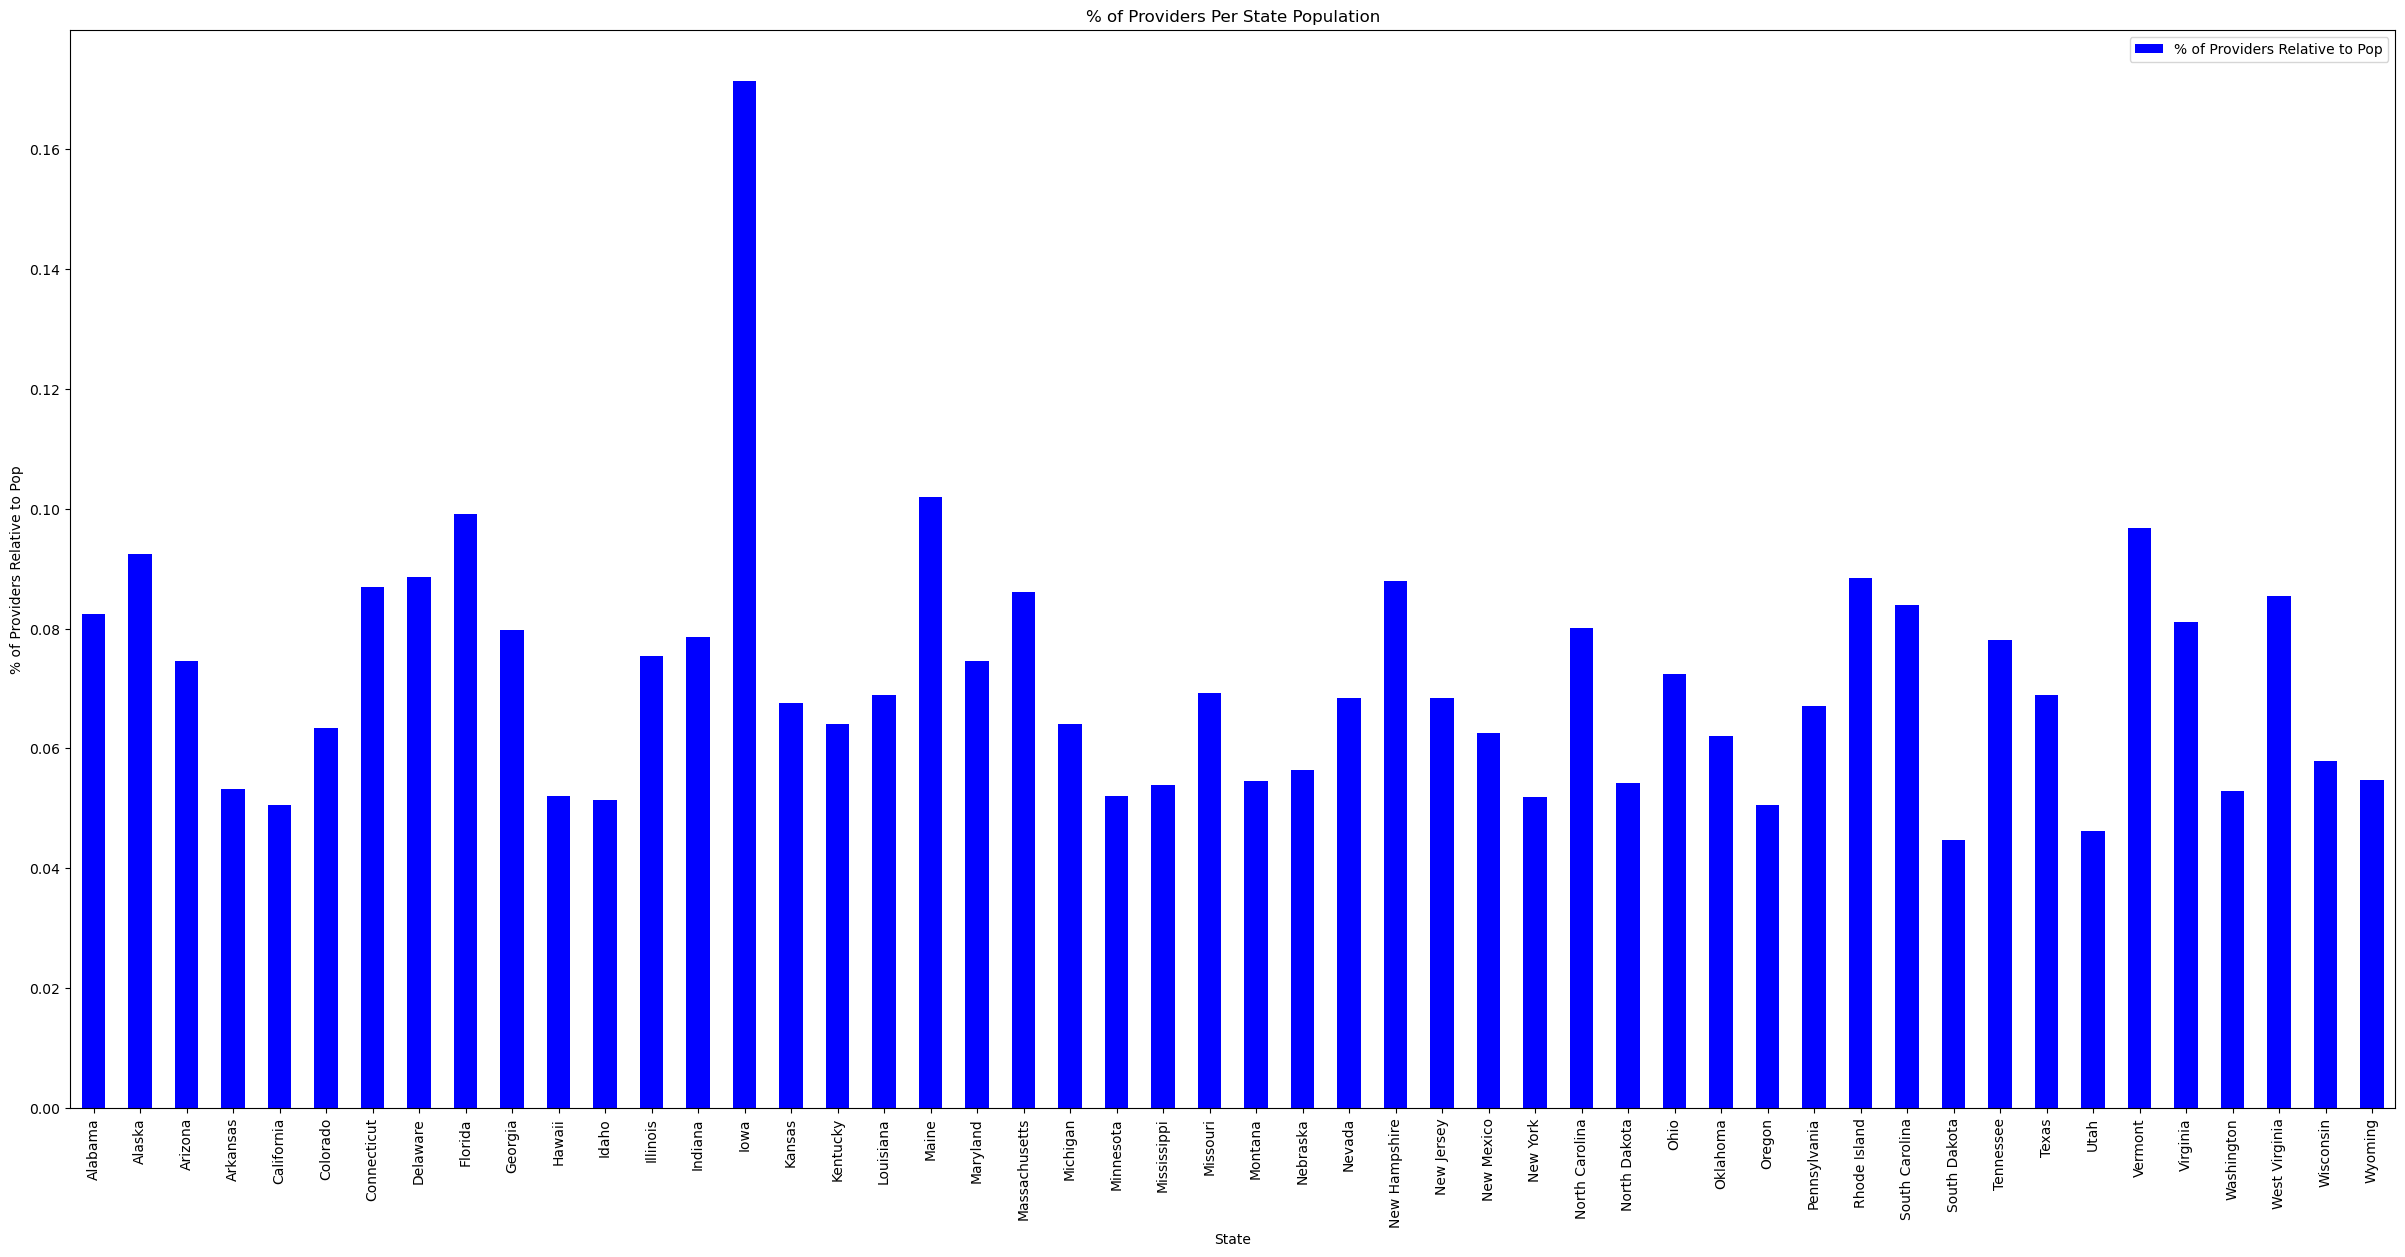

In [19]:
#creating a bar graph displaying % of providers relative to pop by state
percent_bar = provider_percent2.plot(kind="bar", color="blue", figsize=(30,14))
plt.xlabel("State")
plt.ylabel("% of Providers Relative to Pop")

#set a title for the chart
plt.title("% of Providers Per State Population")

#saving chart
plt.savefig("providers_per_state_pop.png")
#showing the chart
plt.show()

In [20]:
deaths_provider_merged = pd.merge(provider_percent, death_rates_df, on = "State")
deaths_provider_merged.head()

,State,% of Providers Relative to Pop,Year,Rate,Deaths (Raw #)
0,Alabama,0.082460,2021,152.8,9491
1,Alaska,0.092447,2021,109.5,763
2,Arizona,0.074656,2021,139.5,12706
3,Arkansas,0.053295,2021,127.7,4739
4,California,0.050528,2021,99.9,44540


In [21]:
filtered_merged = deaths_provider_merged[["State", "% of Providers Relative to Pop", "Rate"]]
filtered_merged.head()

,State,% of Providers Relative to Pop,Rate
0,Alabama,0.082460,152.8
1,Alaska,0.092447,109.5
2,Arizona,0.074656,139.5
3,Arkansas,0.053295,127.7
4,California,0.050528,99.9


In [22]:
filtered_merged2 = filtered_merged.set_index("State")
filtered_merged2.head()

,% of Providers Relative to Pop,Rate
State,,
Alabama,0.082460,152.8
Alaska,0.092447,109.5
Arizona,0.074656,139.5
Arkansas,0.053295,127.7
California,0.050528,99.9


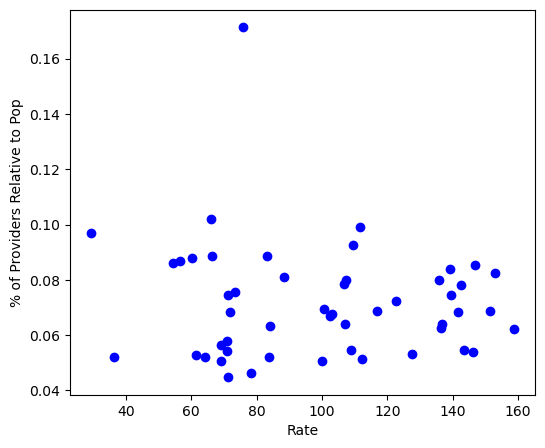

In [23]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
plt.scatter(filtered_merged2["Rate"], 
            filtered_merged2["% of Providers Relative to Pop"], color="blue")
plt.xlabel("Rate")
plt.ylabel("% of Providers Relative to Pop")

plt.show()

The correlation between death rate and the percent of providers relative to state population is: -0.08


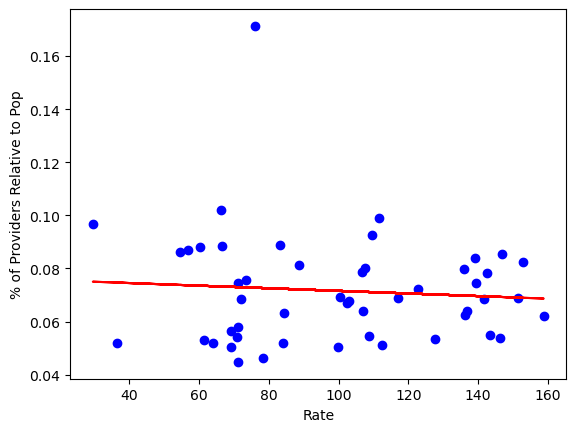

In [24]:
#building the line regression equation and held the x and y values in a variable so it was easier to plot
#without having to retype
x_values = filtered_merged2["Rate"]
y_values = filtered_merged2["% of Providers Relative to Pop"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print statement for pearsonr
correlation = round(st.pearsonr(filtered_merged2["Rate"], 
                                filtered_merged2["% of Providers Relative to Pop"])[0],2)
print(f"The correlation between death rate and the percent of providers relative to state population is: {correlation}")

#plotting the same scatter with the regression line
plt.scatter(filtered_merged2["Rate"], filtered_merged2["% of Providers Relative to Pop"], color="blue")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), color = "red")
plt.xlabel("Rate")
plt.ylabel("% of Providers Relative to Pop")
plt.show()

In [25]:
deaths_provider_merged2 = pd.merge(pop_vs_provider, death_rates_df, on = "State")
deaths_provider_merged2.head()

,State,Total Population,Total Providers,% of Providers Relative to Pop,Total Population per 2M,Year,Rate,Deaths (Raw #)
0,Alabama,5024279,4143,0.082460,2.512139,2021,152.8,9491
1,Alaska,733391,678,0.092447,0.366696,2021,109.5,763
2,Arizona,7151502,5339,0.074656,3.575751,2021,139.5,12706
3,Arkansas,3011524,1605,0.053295,1.505762,2021,127.7,4739
4,California,39538223,19978,0.050528,19.769112,2021,99.9,44540


In [26]:
cleaned_merged2 = deaths_provider_merged2[["State", "Total Providers", "Rate"]]
cleaned_merged2.head()

,State,Total Providers,Rate
0,Alabama,4143,152.8
1,Alaska,678,109.5
2,Arizona,5339,139.5
3,Arkansas,1605,127.7
4,California,19978,99.9


In [27]:
cleaned_merged3 = cleaned_merged2.set_index("State")
cleaned_merged3.head()

,Total Providers,Rate
State,,
Alabama,4143,152.8
Alaska,678,109.5
Arizona,5339,139.5
Arkansas,1605,127.7
California,19978,99.9


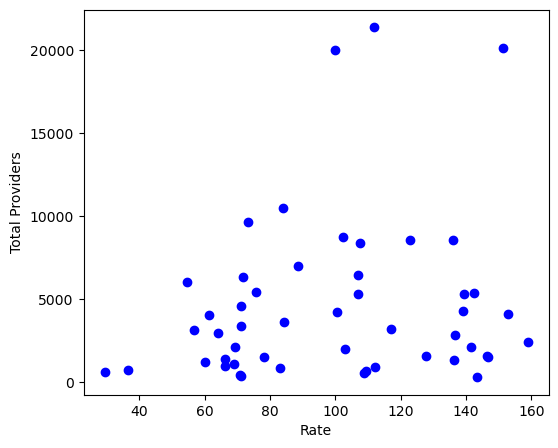

In [28]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
plt.scatter(cleaned_merged3["Rate"], 
            cleaned_merged3["Total Providers"], color="blue")
plt.xlabel("Rate")
plt.ylabel("Total Providers")

plt.show()

The correlation between death rate and the percent of providers relative to state population is: 0.18


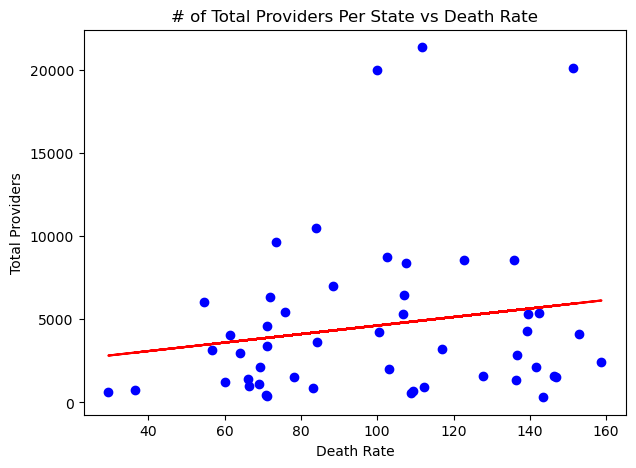

In [29]:
#building the line regression equation and held the x and y values in a variable so it was easier to plot
#without having to retype
x_values = cleaned_merged3["Rate"]
y_values = cleaned_merged3["Total Providers"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print statement for pearsonr
correlation = round(st.pearsonr(cleaned_merged3["Rate"], 
                                cleaned_merged3["Total Providers"])[0],2)
print(f"The correlation between death rate and the percent of providers relative to state population is: {correlation}")

#plotting same scatter
fig1, ax1 = plt.subplots(figsize=(7, 5))
plt.scatter(cleaned_merged3["Rate"], 
            cleaned_merged3["Total Providers"], color="blue")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), color = "red")
plt.xlabel("Death Rate")
plt.ylabel("Total Providers")
plt.title("# of Total Providers Per State vs Death Rate")
#saving the graph
plt.savefig("total_providers_vs_death.png")
#showing the graph
plt.show()

In analyzing the correlation between the COVID-19 death rate per state and number of total providers, the r-value was calculated to be 0.18. This is considered a very weak correlation, which conflicts with our hypothesis that states with more available vaccine providers will have a lower death rate.

In [30]:
providers_and_vaccines = pd.merge(deaths_provider_merged2, renamed_vaccine, on = "State")
providers_and_vaccines.head()

,State,Total Population,Total Providers,% of Providers Relative to Pop,Total Population per 2M,Year,Rate,Deaths (Raw #),Total doses distributed,Doses distributed per 100k pop,...,Residents 5+ with an updated (bivalent) booster dose,Percent of 5+ pop with an updated (bivalent) booster dose,Residents 12+ with an updated (bivalent) booster dose,Percent of 12+ pop with an updated (bivalent) booster dose,Residents 18+ with an updated (bivalent) booster dose,Percent of 18+ pop with an updated (bivalent) booster dose,Residents 65+ with an updated (bivalent) booster dose,Percent of 65+ pop with an updated (bivalent) booster dose,Children <5 with at least one dose,Total number of updated (bivalent) booster doses administered
0,Alabama,5024279,4143,0.082460,2.512139,2021,152.8,9491,12349530,251868.0,...,376516,8.2,374521,8.9,366925,9.6,202699,23.9,NaN,NaN
1,Alaska,733391,678,0.092447,0.366696,2021,109.5,763,2176065,297462.0,...,103619,15.2,100512,16.5,95906,17.4,39311,42.9,NaN,NaN
2,Arizona,7151502,5339,0.074656,3.575751,2021,139.5,12706,19959120,274212.0,...,1147905,16.8,1118947,18.0,1074856,19.1,523583,40.0,NaN,NaN
3,Arkansas,3011524,1605,0.053295,1.505762,2021,127.7,4739,8373210,277460.0,...,330572,11.7,325981,12.7,317694,13.7,174653,33.3,NaN,NaN
4,California,39538223,19978,0.050528,19.769112,2021,99.9,44540,121107865,306507.0,...,8114063,21.9,7885573,23.4,7555616,24.7,2821306,48.3,NaN,NaN


In [31]:
filtered = providers_and_vaccines[["State", 
                                   "% of Providers Relative to Pop", 
                                   "Percent of total pop with a completed primary series"]]
filtered.head()

,State,% of Providers Relative to Pop,Percent of total pop with a completed primary series
0,Alabama,0.082460,53.3
1,Alaska,0.092447,65.3
2,Arizona,0.074656,66.2
3,Arkansas,0.053295,57.0
4,California,0.050528,74.9


In [32]:
filtered = filtered.set_index("State")
filtered.head()

,% of Providers Relative to Pop,Percent of total pop with a completed primary series
State,,
Alabama,0.082460,53.3
Alaska,0.092447,65.3
Arizona,0.074656,66.2
Arkansas,0.053295,57.0
California,0.050528,74.9


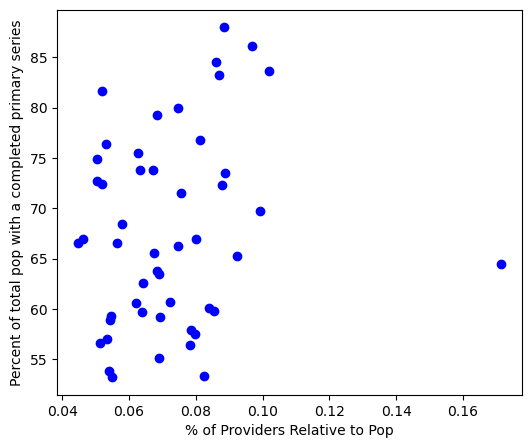

In [33]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
plt.scatter(filtered["% of Providers Relative to Pop"], 
            filtered["Percent of total pop with a completed primary series"], color="blue")
plt.xlabel("% of Providers Relative to Pop")
plt.ylabel("Percent of total pop with a completed primary series")

plt.show()

The correlation between available providers and the percent of the total population with a completed primary series is: 0.18


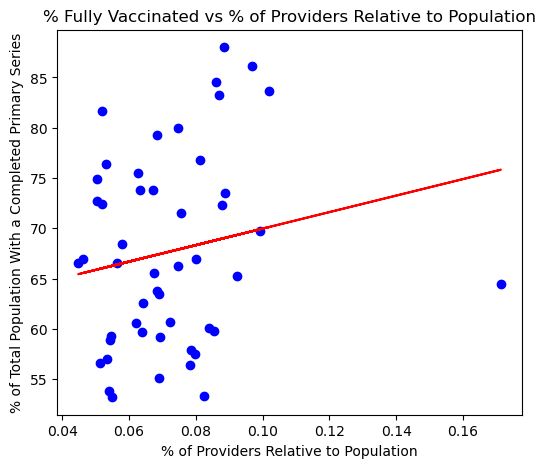

In [34]:
x_values = filtered["% of Providers Relative to Pop"]
y_values = filtered["Percent of total pop with a completed primary series"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print statement for pearsonr
correlation = round(st.pearsonr(filtered["% of Providers Relative to Pop"], 
                                filtered["Percent of total pop with a completed primary series"])[0],2)
print(f"The correlation between available providers and the percent of the total population with a completed primary series is: {correlation}")

#plotting same scatter with regression
fig1, ax1 = plt.subplots(figsize=(6, 5))
plt.scatter(filtered["% of Providers Relative to Pop"], 
            filtered["Percent of total pop with a completed primary series"], color="blue")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), color = "red")
plt.xlabel("% of Providers Relative to Population")
plt.ylabel("% of Total Population With a Completed Primary Series")
plt.title("% Fully Vaccinated vs % of Providers Relative to Population")
#saving graph
plt.savefig("percent_vaccinated_vs_percent_providers")
#showing graph
plt.show()

In [35]:
filtered2 = providers_and_vaccines[["State", 
                                   "Total Providers", 
                                   "Percent of total pop with a completed primary series"]]
filtered2.head()

,State,Total Providers,Percent of total pop with a completed primary series
0,Alabama,4143,53.3
1,Alaska,678,65.3
2,Arizona,5339,66.2
3,Arkansas,1605,57.0
4,California,19978,74.9


In [36]:
filtered2 = filtered2.set_index("State")
filtered2.head()

,Total Providers,Percent of total pop with a completed primary series
State,,
Alabama,4143,53.3
Alaska,678,65.3
Arizona,5339,66.2
Arkansas,1605,57.0
California,19978,74.9


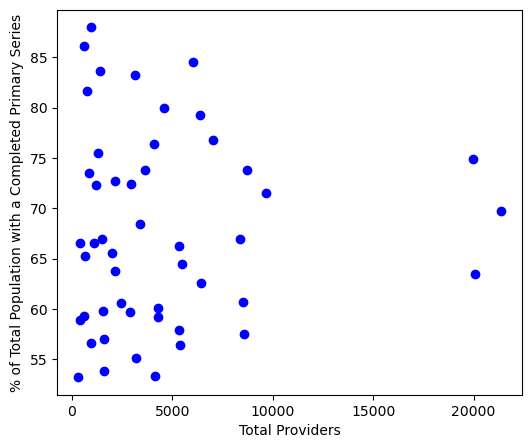

In [37]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
plt.scatter(filtered2["Total Providers"], 
            filtered2["Percent of total pop with a completed primary series"], color="blue")
plt.xlabel("Total Providers")
plt.ylabel("% of Total Population with a Completed Primary Series")

plt.show()

In [38]:
x_values = filtered2["Total Providers"]
y_values = filtered2["Percent of total pop with a completed primary series"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print statement for pearsonr
correlation = round(st.pearsonr(filtered2["Total Providers"], 
                                filtered2["Percent of total pop with a completed primary series"])[0],2)
print(f"The correlation between total providers and the percent of the total population with a completed primary series is: {correlation}")


The correlation between total providers and the percent of the total population with a completed primary series is: 0.04
